In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import bioframe
import numpy as np

In [44]:
gm_df = pd.read_csv('../annotations/GM12878_hg38_50kb.tsv', sep = '\t')
im_df = pd.read_csv('../annotations/IMR90_hg38_50kb.tsv', sep = '\t')

In [45]:
one_track = gm_df[gm_df["E1"] == gm_df["E1"]]

In [46]:
one_track.binary.unique()

array([0., 1.])

In [48]:
mat = np.zeros((len(one_track.binary.unique()), len(one_track.HMM3P.unique())))

In [49]:
hmm_states = ['B', 'Mbb', 'M', 'Maa', 'A']

In [65]:
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        mat[i,j] = len(one_track[(one_track["binary"]==i) & (one_track["HMM3P"]==j)])

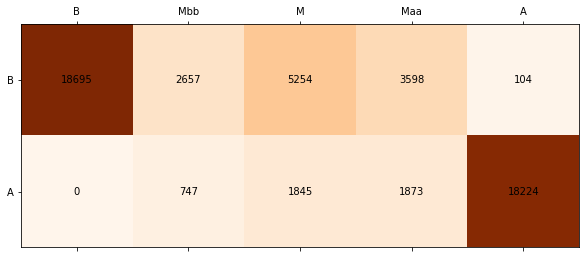

In [66]:
plt.matshow(mat, cmap="Oranges")
for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            text = plt.gca().text(j, i, int(mat[i, j]),
                           ha="center", va="center", color="black")
            
ticksx = np.arange(0,len(hmm_states),1)
plt.gca().set_xticks(ticksx)
plt.gca().set_xticklabels(hmm_states)

ticksy = np.arange(0,2,1)
plt.gca().set_yticks(ticksy)
plt.gca().set_yticklabels(['B', 'A']);

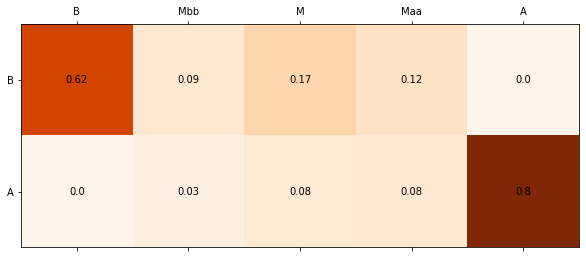

In [67]:
M = mat/ mat.sum(axis=1, keepdims=True)
plt.matshow(M, cmap="Oranges")
for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            text = plt.gca().text(j, i, np.round(M[i, j],2),
                           ha="center", va="center", color="black")
            
ticksx = np.arange(0,len(hmm_states),1)
plt.gca().set_xticks(ticksx)
plt.gca().set_xticklabels(hmm_states)

ticksy = np.arange(0,2,1)
plt.gca().set_yticks(ticksy)
plt.gca().set_yticklabels(['B', 'A']);

In [59]:
mat/ mat.sum(axis=0, keepdims=True)

array([[1.        , 0.78055229, 0.74010424, 0.65764942, 0.00567438],
       [0.        , 0.21944771, 0.25989576, 0.34235058, 0.99432562]])

In [20]:
def between_cells(hmm_track1, hmm_track2, hmm):
    mask = (hmm_track1["E1"] == hmm_track1["E1"]) & (hmm_track2["E1"] == hmm_track2["E1"])
    track1= hmm_track1[mask]
    track2= hmm_track2[mask]
    
    size = len(track1[hmm].unique())
    mat = np.zeros((size, size))
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            mat[i,j] = ((track1[hmm]==i) & (track2[hmm]==j)).sum()
    
    return mat

In [35]:
def plot_mat(mat, states_names, cell_name1, cell_name2):
    plt.figure(1, figsize=(10,10))
    plt.matshow(mat, cmap="Oranges", fignum=1)

    plt.ylabel(cell_name1)
    plt.xlabel(cell_name2)
    ticks = np.arange(0, len(states_names), 1)
    plt.gca().set_yticks(ticks)
    plt.gca().set_xticks(ticks)
    plt.gca().set_yticklabels(states_names)
    plt.gca().set_xticklabels(states_names)
    plt.colorbar()
    for i in range(mat.shape[0]):
            for j in range(mat.shape[1]):
                text = plt.gca().text(j, i, int(mat[i, j]),
                               ha="center", va="center", color="black")

In [39]:
def plot_mat2(mat, states_names, cell_name1, cell_name2):
    plt.figure(1, figsize=(10,10))
    plt.matshow(mat, cmap="bwr", fignum=1,  vmin=0, vmax=2)

    plt.ylabel(cell_name1)
    plt.xlabel(cell_name2)
    ticks = np.arange(0, len(states_names), 1)
    plt.gca().set_yticks(ticks)
    plt.gca().set_xticks(ticks)
    plt.gca().set_yticklabels(states_names)
    plt.gca().set_xticklabels(states_names)
    plt.colorbar()
    for i in range(mat.shape[0]):
            for j in range(mat.shape[1]):
                text = plt.gca().text(j, i, np.round(mat[i, j],2),
                               ha="center", va="center", color="black")

In [36]:
mat = between_cells(gm_df, im_df, "HMM5_2")

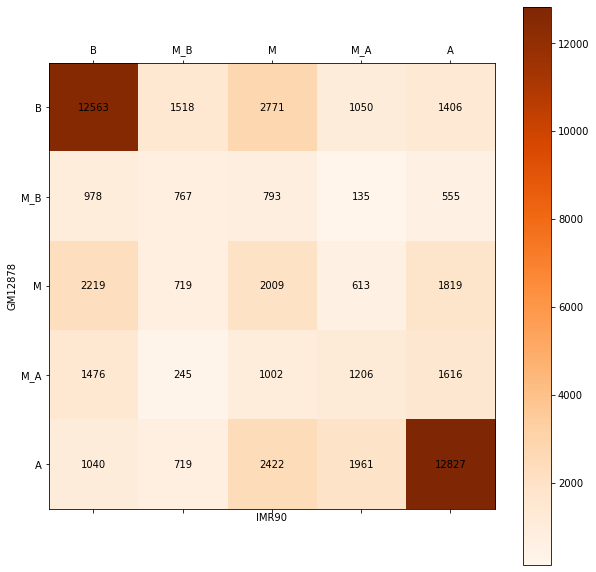

In [37]:
plot_mat(mat, ["B", "M_B", "M", "M_A", "A"], "GM12878", "IMR90")


In [38]:
p1 = mat.sum(axis=0, keepdims=True)
p1 = p1/p1.sum()
p2 = mat.sum(axis=1, keepdims=True)
p2 = p2/p2.sum()
mat2 = np.dot(p2, p1)
mat2*mat.sum()

array([[6483.18006945, 1407.59786143, 3191.57206636, 1761.27101361,
        6464.37898914],
       [1083.88778041,  235.3286667 ,  533.58165684,  294.45736648,
        1080.74452957],
       [2477.69762443,  537.9461684 , 1219.73328556,  673.11056606,
        2470.51235555],
       [1861.88281982,  404.24332617,  916.57691672,  505.8135369 ,
        1856.48340039],
       [6369.35170589, 1382.88397729, 3135.53607452, 1730.34751695,
        6350.88072535]])

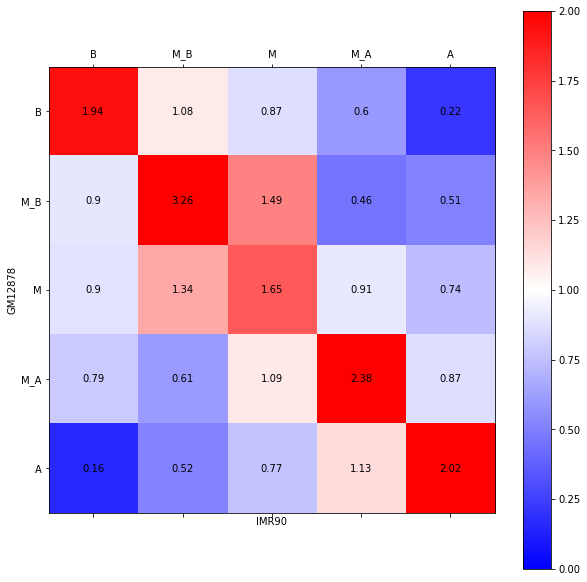

In [40]:
plot_mat2(mat/(mat2*mat.sum()), ["B", "M_B", "M", "M_A", "A"], "GM12878", "IMR90")
